<center>
<p>
<center>
Universidade Federal de Minas Gerais <br/>
Introdução à Programação de Computadores <br/>
2024/2
</center>
</p>
<h1><b>Projeto Prático Final</b></h1>
<b>Total: 10 pontos</b>
</center>

<br/>
<p>
<h4><b>Professores:</b></h4>
<ul>
    <li>George Luiz Medeiros Teodoro</li>
    <li>João Guilherme Maia de Menezes</li>
</ul>

In [ ]:
#@markdown ####**Aluno** {run: "auto"}
Nome = "" #@param {type:"string"}
Matrícula = "" #@param {type:"string"}

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados sobre economia mineral no Brasil gerados pela Agência Nacional de Mineração. Os dados utilizados estão disponíveis em [https://www.gov.br/anm](https://www.gov.br/anm/pt-br)

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Nas duas células abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.

**OBS1: Execute as duas células abaixo**

**OBS2: O arquivo é grande, então pode demorar para realizar o download (cerca de 10 minutos)**


In [1]:
import requests, os

#URL = 'https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv'
URL = 'https://drive.usercontent.google.com/download?id=1A19BBwzUBEcxLGFWzoi8YrhbiKc9rgdw&export=download&confirm=t&uuid=7f62e0ce-a208-41bd-8f14-2cf6a173fdc9'
r = requests.get(URL, allow_redirects=True)
file_name = URL.split('/')[-1]
with open(file_name, 'wb') as f:
    f.write(r.content)
os.rename(file_name, 'CFEM_Arrecadacao.csv')

In [2]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo.
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica.
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    with open(filename, 'r', encoding='ISO-8859-1') as file:

        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes:
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
            dados[-1][-3] = dados[-1][-3].replace(',','.')
            dados[-1][-1] = dados[-1][-1].replace(',','.')

    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)

    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("CFEM_Arrecadacao.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))
print()

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

['Ano', 'Mês', 'Processo', 'AnoDoProcesso', 'Tipo_PF_PJ', 'CPF_CNPJ', 'Substância', 'UF', 'Município', 'QuantidadeComercializada', 'UnidadeDeMedida', 'ValorRecolhido'] 

['2002', '8', '910262', '2007', 'PJ', '88503388000194', 'BASALTO', 'RS', 'TRÊS DE MAIO', '0', 'm3 ', '206.41']
Número total de registros: 2007476

{'Ano': 0, 'Mês': 1, 'Processo': 2, 'AnoDoProcesso': 3, 'Tipo_PF_PJ': 4, 'CPF_CNPJ': 5, 'Substância': 6, 'UF': 7, 'Município': 8, 'QuantidadeComercializada': 9, 'UnidadeDeMedida': 10, 'ValorRecolhido': 11}


Tarefa 1 - Evolução da arrecadação ao longo dos anos - (2 pontos)
---------

**Agora é com você!**

Implemente funções para gerar um gráfico com o valor recolhido do CFEM no estado de Minas Gerais ao longo dos anos (2004 a 2024 em milhões de reais).



In [ ]:
## Escreva o seu código aqui
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


dados_MG = []

def State_Verification(State, Empty_List):
  for line in range(len(dados)):
    if dados[line][7] == State:
      Empty_List.append(dados[line])

  return Empty_List

dados_MG = State_Verification('MG', dados_MG)

"""for index in range(len(dados)):
  if (dados[index][7]) == 'MG':
    dados_MG.append(dados[index])"""

#print(dados_MG[0])
#print(len(dados_MG))

ValorRecolhido_MG = np.array([], dtype=np.float64)
Anos = list(range(2004, 2025))

def Valor_Recolhido(Year_List, Empty_Array, Data_List):
  for ano in range(len(Year_List)):
    Soma_VR = 0.00
    for line in range(len(Data_List)):
      if int(Data_List[line][0]) == int(Year_List[ano]):
        Soma_VR += float(Data_List[line][11])
    Empty_Array = np.append(Empty_Array, Soma_VR)

  return Empty_Array

ValorRecolhido_MG = Valor_Recolhido(Anos, ValorRecolhido_MG, dados_MG)

"""for ano in range(len(Anos)):
  Soma_VR = 0.00
  for index in range(len(dados_MG)):
    if int(dados_MG[index][0]) == int(Anos[ano]):
      Soma_VR += float(dados_MG[index][11])
  #print(Soma_VR)
  ValorRecolhido_MG = np.append(ValorRecolhido_MG, Soma_VR)"""

#print(ValorRecolhido_MG)

#print(len(ValorRecolhido_MG))
#print(len(Anos))

ValorRecolhido_MG_Milhoes = np.divide(ValorRecolhido_MG, 1000000)

#print(ValorRecolhido_MG_Milhoes)
#print(ValorRecolhido_MG_Milhoes[0])

items = len(ValorRecolhido_MG_Milhoes)

#print(len(ValorRecolhido_MG_Milhoes))
#print(len(Anos))

def Plotting_Graph(min_year, max_year, Data_Array):
  x = np.arange(min_year, (max_year + 1), 1)
  y = np.array([])
  plt.xticks(x)
  for items in range(len(Data_Array)):
    y = np.append(y, float(Data_Array[items]))

  return plt.plot(x, y)

Plotting_Graph(2004, 2024, ValorRecolhido_MG_Milhoes)

#x = np.arange(2004, 2025, 1)
#y = np.array([])

plt.xticks(rotation=65)

"""for index in range(items):
  y = np.append(y, float(ValorRecolhido_MG_Milhoes[index]))

plt.plot(x, y)"""

plt.ylabel("Valor Recolhido(em milhões de reais)")

plt.grid(True)

plt.show()



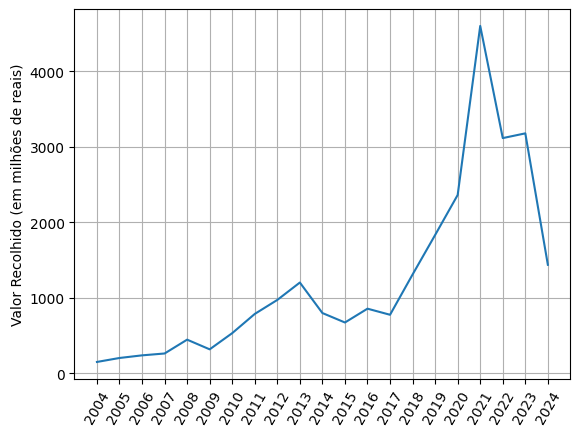

In [ ]:
# Não execute esta célula para não perder o gabarito




Tarefa 2 - Extração de ferro por estado entre 2014 e 2024 - (2 pontos)
---------

Implemente funções para plotar um gráfico de barras que mostra a extração de ferro (**'FERRO'**) por estado brasileiro entre os anos de 2014 e 2024.

**Dica 1:** Ferro é representado pela string 'FERRO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('') e se é diferente de 0 (zero).

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

In [ ]:
## Escreva o seu código aqui




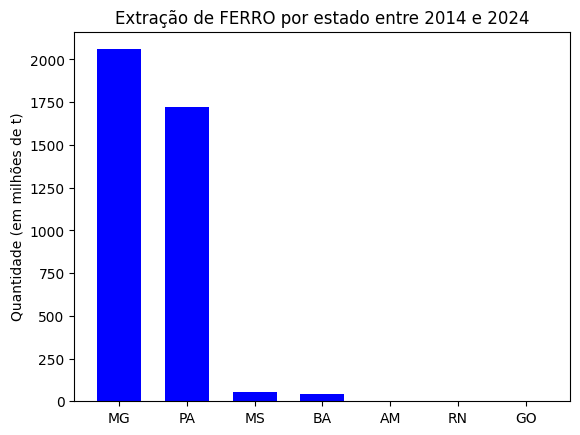

In [ ]:
# Não execute esta célula para não perder o gabarito




Tarefa 3 - Extração de ouro por estado nos últimos dez anos - (2 pontos)
---------

Implemente funções para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2013 até 2023) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

**Dica 1:** Ouro é representado pela string 'OURO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

In [ ]:
# Escreva o seu código aqui




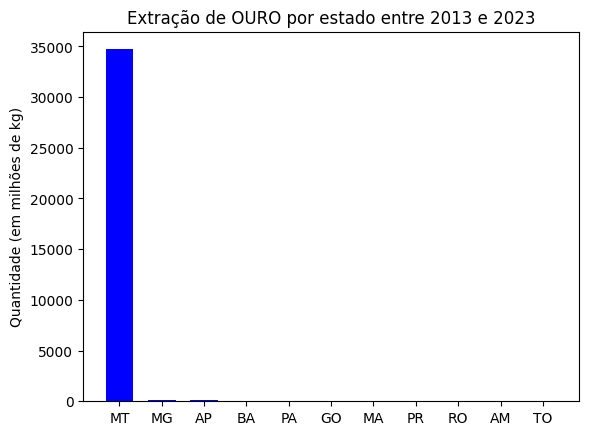

In [ ]:
# Não execute esta célula para não perder o gabarito




Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará - (2 pontos)
---------

Implemente funções para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 2003 até 2024). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

**Dica 1:** Ferro é representada pela string 'FERRO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

In [ ]:
# Escreva o seu código aqui




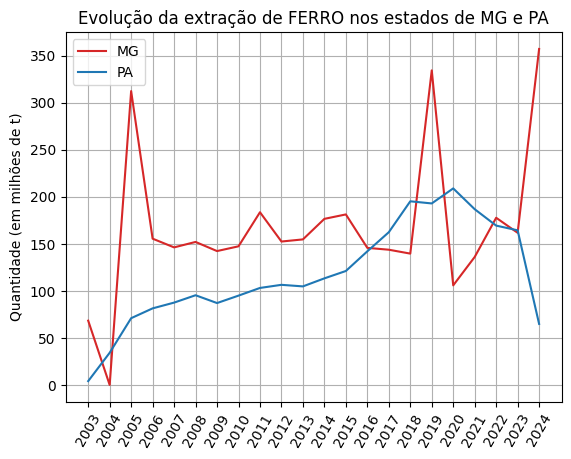

In [ ]:
# Não execute esta célula para não perder o gabarito




Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul e Minas Gerais no ano de 2023 por tipo de minério extraído - (2 pontos)
---------

Implemente funções para plotar um gráfico de barras que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul ('PR', 'SC' e 'RS') no ano de 2023. Utilize o mesmo código para plotar o mesmo gráfico considerando apenas o Estado de Minas Gerais.

**Dica 1:** por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


In [ ]:
# Escreva o seu código aqui




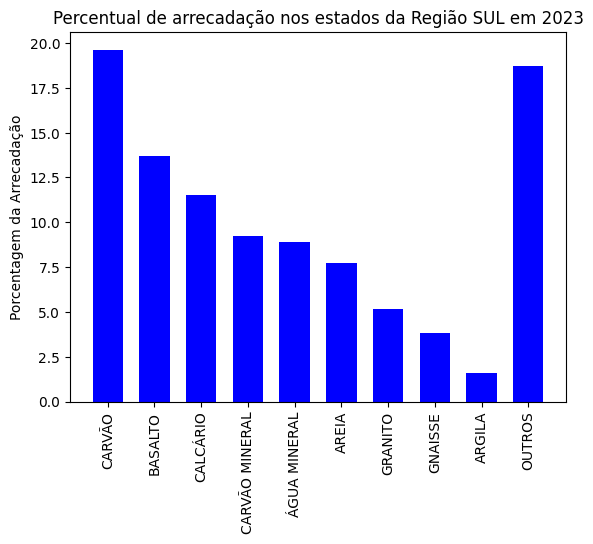

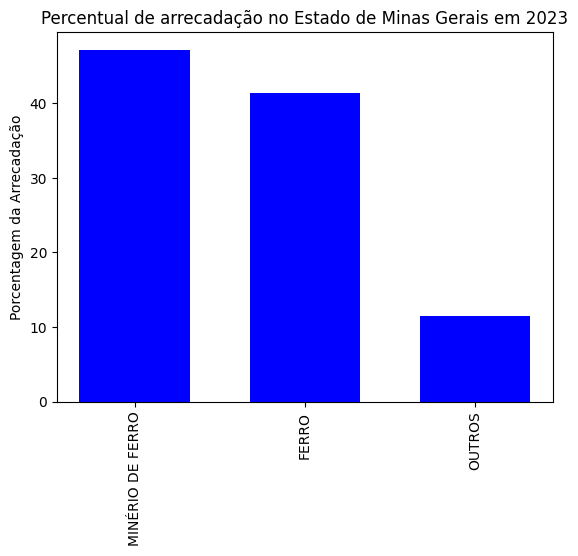

In [ ]:
# Não execute esta célula para não perder o gabarito


